In [1]:
import results
import os
import pickle
from matplotlib import pyplot as plt
import numpy as np

results_dir = '2022-3-9_11-44-17'
results_path = os.path.join(os.getcwd(), 'results', results_dir, 'results.pickle')

with open(results_path, 'rb') as F:
    Results = pickle.load(F)

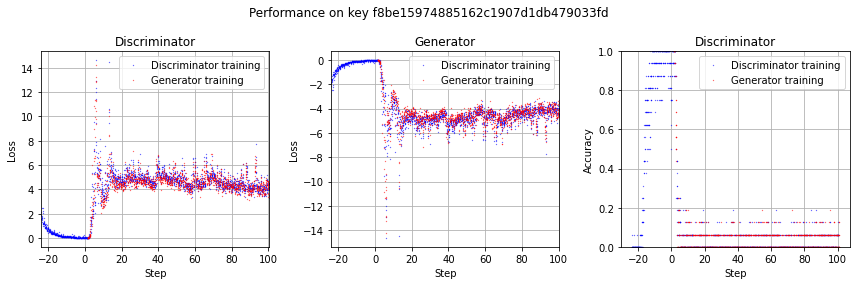

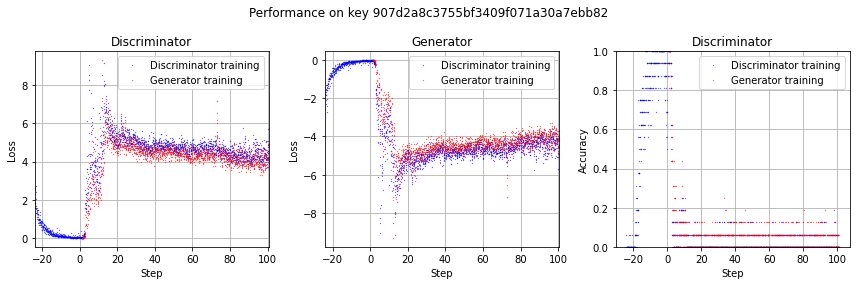

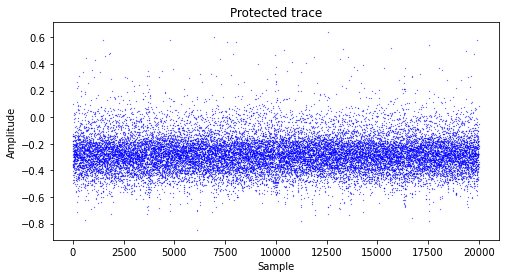

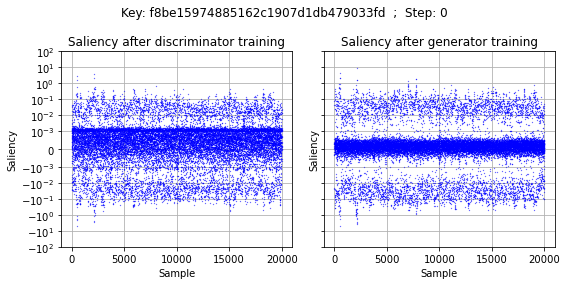

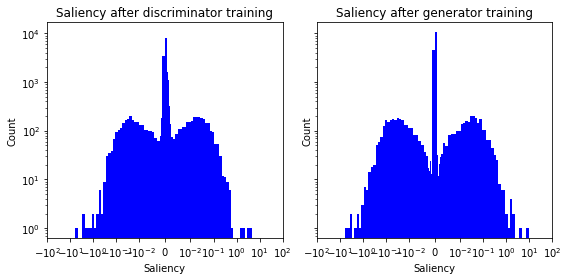

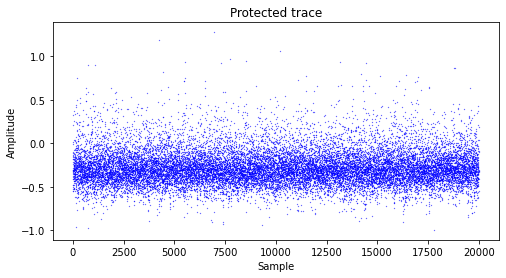

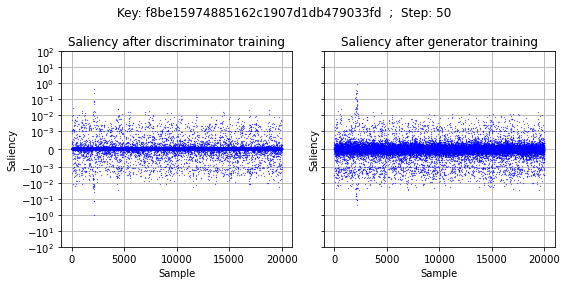

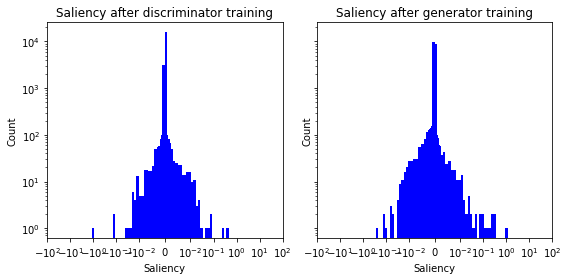

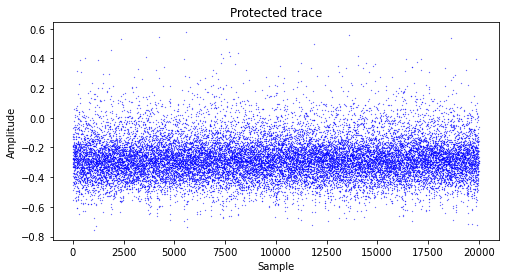

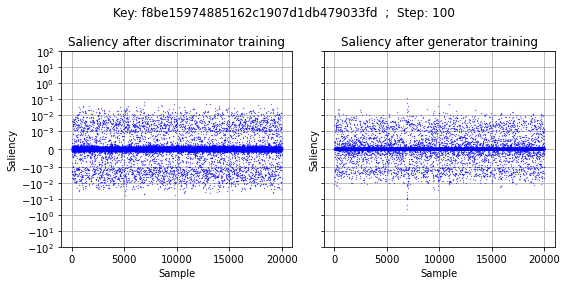

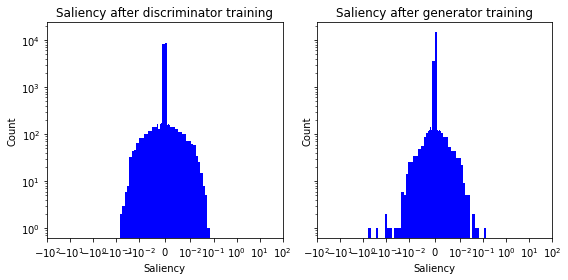

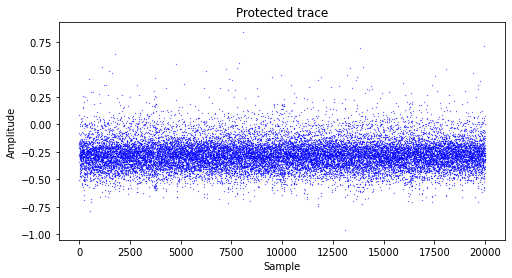

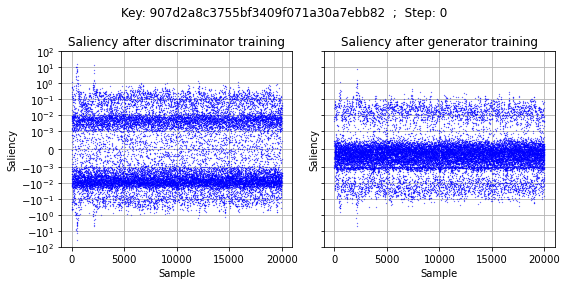

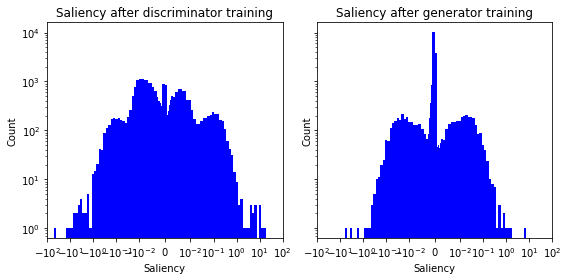

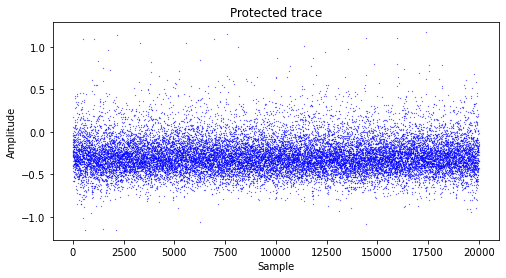

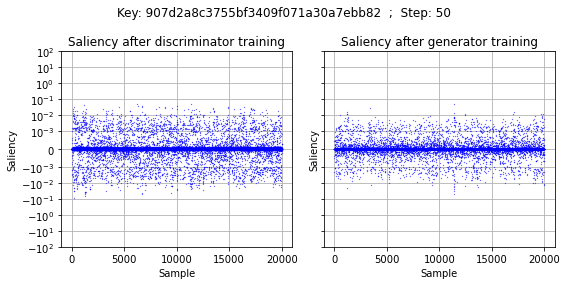

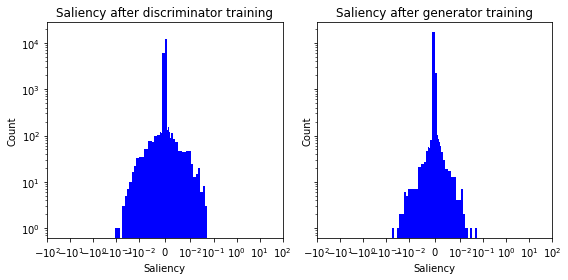

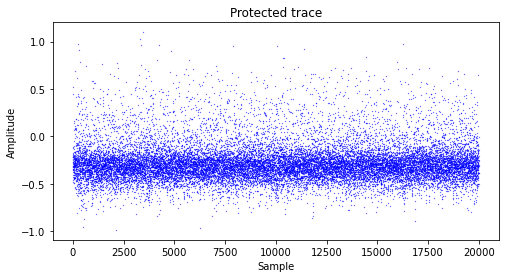

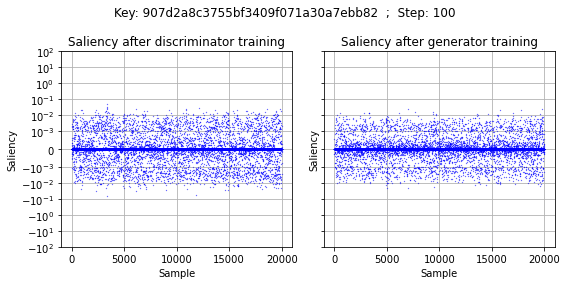

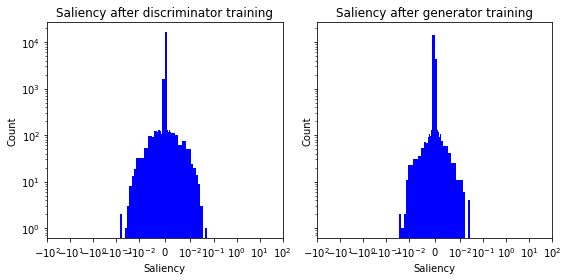

In [2]:
Gloss = Results['gen_training_loss']
Dloss = Results['disc_training_loss']
Accuracy = Results['disc_training_accuracy']
Saliency = Results['saliency']

loss_figure_kwargs = {
    'xticks0': np.arange(0, 500, 100),
    'xticks1': np.arange(0, 500, 100),
    'yticks0': np.logspace(0, 4, 9, endpoint=True),
    'yticks1': -np.logspace(4, 0, 9, endpoint=True),
    'grid0': True,
    'grid1': True,
    'yscale0': 'symlog',
    'yscale1': 'symlog'
}

keys = [k for k in Gloss]
for key in keys:
    results.generate_loss_figure(Dloss, Gloss, Accuracy, key, **loss_figure_kwargs)
    plt.show()
    plt.close()

keys = [k for k in Saliency]
for key in keys:
    steps = [s for s in Saliency[key]]
    for step in steps:
        results.generate_saliency_figure(Saliency, key, step)
        plt.show()
        plt.close()